In [2]:
import pandas as pd
df = pd.read_csv('data_clean.csv')
df = df.drop(columns=['Unnamed: 0'])


In [3]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [4]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
...,...,...,...,...,...,...,...,...,...,...
48361,2025-06-29,Canada,Guatemala,1,1,Gold Cup,Minneapolis,United States,True,Guatemala
48362,2025-06-29,United States,Costa Rica,2,2,Gold Cup,Minneapolis,United States,False,United States
48363,2025-07-02,United States,Guatemala,2,1,Gold Cup,St. Louis,United States,False,United States
48364,2025-07-02,Mexico,Honduras,1,0,Gold Cup,Santa Clara,United States,True,Mexico


In [5]:
df['year'] = df['date'].dt.year
df['decade'] = (df['year'] // 10) * 10

In [6]:
df['total_goals'] = df['home_score'] + df['away_score']
agg = (
    df.groupby('decade')
      .agg(avg_home_goals  = ('home_score','mean'),
           avg_away_goals  = ('away_score','mean'),
           avg_total_goals = ('total_goals','mean'))
      .reset_index()
)

In [7]:
df.columns


Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'winner', 'year', 'decade',
       'total_goals'],
      dtype='object')

In [8]:
cols = [
        'date','year','decade', 'home_team', 'away_team', 'home_score',
        'away_score', 'total_goals', 'winner', 'tournament', 'city','country','neutral'
    ]
df = df[cols]


In [9]:
df

,date,year,decade,home_team,away_team,home_score,away_score,total_goals,winner,tournament,city,country,neutral
0,1872-11-30,1872,1870,Scotland,England,0,0,0,Draw,Friendly,Glasgow,Scotland,False
1,1873-03-08,1873,1870,England,Scotland,4,2,6,England,Friendly,London,England,False
2,1874-03-07,1874,1870,Scotland,England,2,1,3,Scotland,Friendly,Glasgow,Scotland,False
3,1875-03-06,1875,1870,England,Scotland,2,2,4,Draw,Friendly,London,England,False
4,1876-03-04,1876,1870,Scotland,England,3,0,3,Scotland,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48361,2025-06-29,2025,2020,Canada,Guatemala,1,1,2,Guatemala,Gold Cup,Minneapolis,United States,True
48362,2025-06-29,2025,2020,United States,Costa Rica,2,2,4,United States,Gold Cup,Minneapolis,United States,False
48363,2025-07-02,2025,2020,United States,Guatemala,2,1,3,United States,Gold Cup,St. Louis,United States,False
48364,2025-07-02,2025,2020,Mexico,Honduras,1,0,1,Mexico,Gold Cup,Santa Clara,United States,True


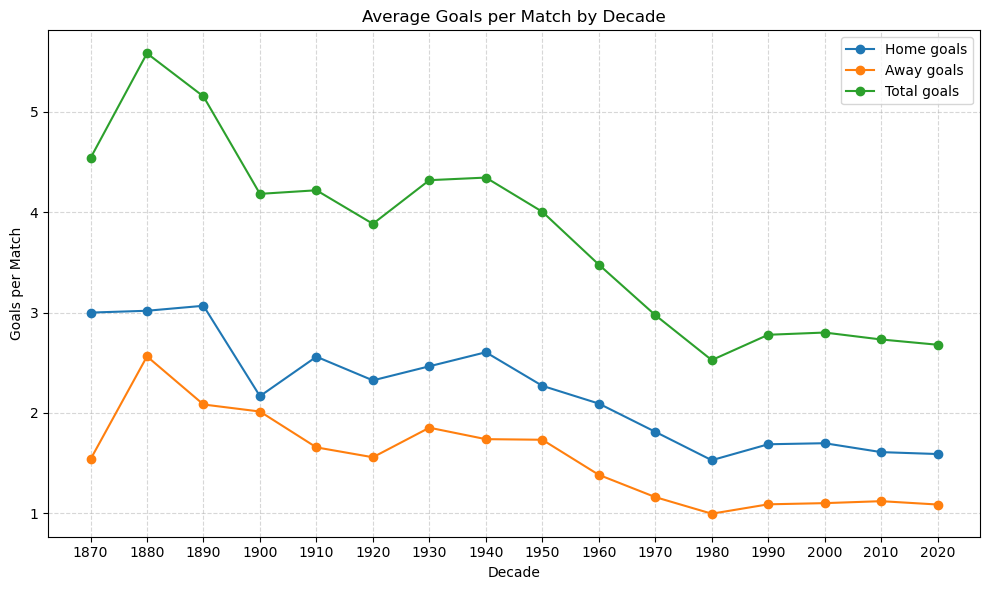

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(agg['decade'], agg['avg_home_goals'], marker='o', label='Home goals')
plt.plot(agg['decade'], agg['avg_away_goals'], marker='o', label='Away goals')
plt.plot(agg['decade'], agg['avg_total_goals'], marker='o', label='Total goals')

plt.title('Average Goals per Match by Decade')
plt.xlabel('Decade')
plt.ylabel('Goals per Match')
plt.xticks(agg['decade'])        # ensure each decade shows up
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [11]:
df['home_win'] = df['home_score'] > df['away_score']

# 3. Aggregate by decade
home_adv = (
    df
    .groupby('decade')
    .agg(
        games        = ('home_win', 'size'),
        home_wins    = ('home_win', 'sum')
    )
    .assign(
        home_win_pct = lambda x: x['home_wins'] / x['games'] * 100
    )
    .reset_index()
)

print(home_adv)

    decade  games  home_wins  home_win_pct
0     1870     13          8     61.538462
1     1880     55         27     49.090909
2     1890     59         30     50.847458
3     1900    137         62     45.255474
4     1910    330        181     54.848485
5     1920    828        438     52.898551
6     1930   1079        566     52.455978
7     1940    833        444     53.301321
8     1950   1651        809     49.000606
9     1960   2972       1555     52.321669
10    1970   4132       2068     50.048403
11    1980   5024       2369     47.153662
12    1990   6943       3452     49.719142
13    2000   9525       4635     48.661417
14    2010   9752       4673     47.918376
15    2020   5033       2402     47.725015


C:\Users\jorgi\AppData\Local\Temp\ipykernel_19888\925966721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['home_win'] = df['home_score'] > df['away_score']


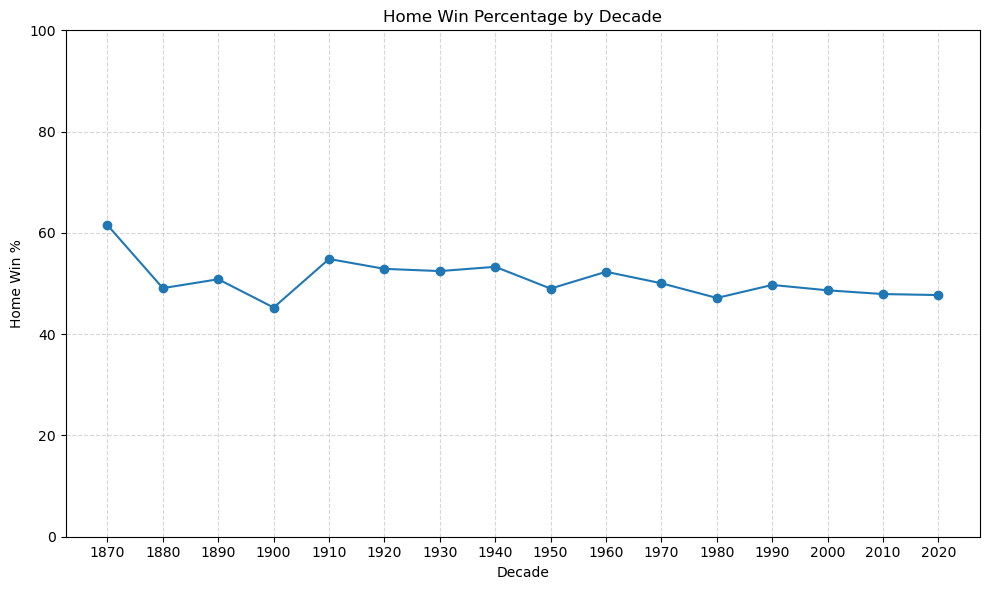

In [12]:
plt.figure(figsize=(10,6))
plt.plot(home_adv['decade'], home_adv['home_win_pct'], marker='o')
plt.title('Home Win Percentage by Decade')
plt.xlabel('Decade')
plt.ylabel('Home Win %')
plt.xticks(home_adv['decade'])
plt.ylim(0, 100)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

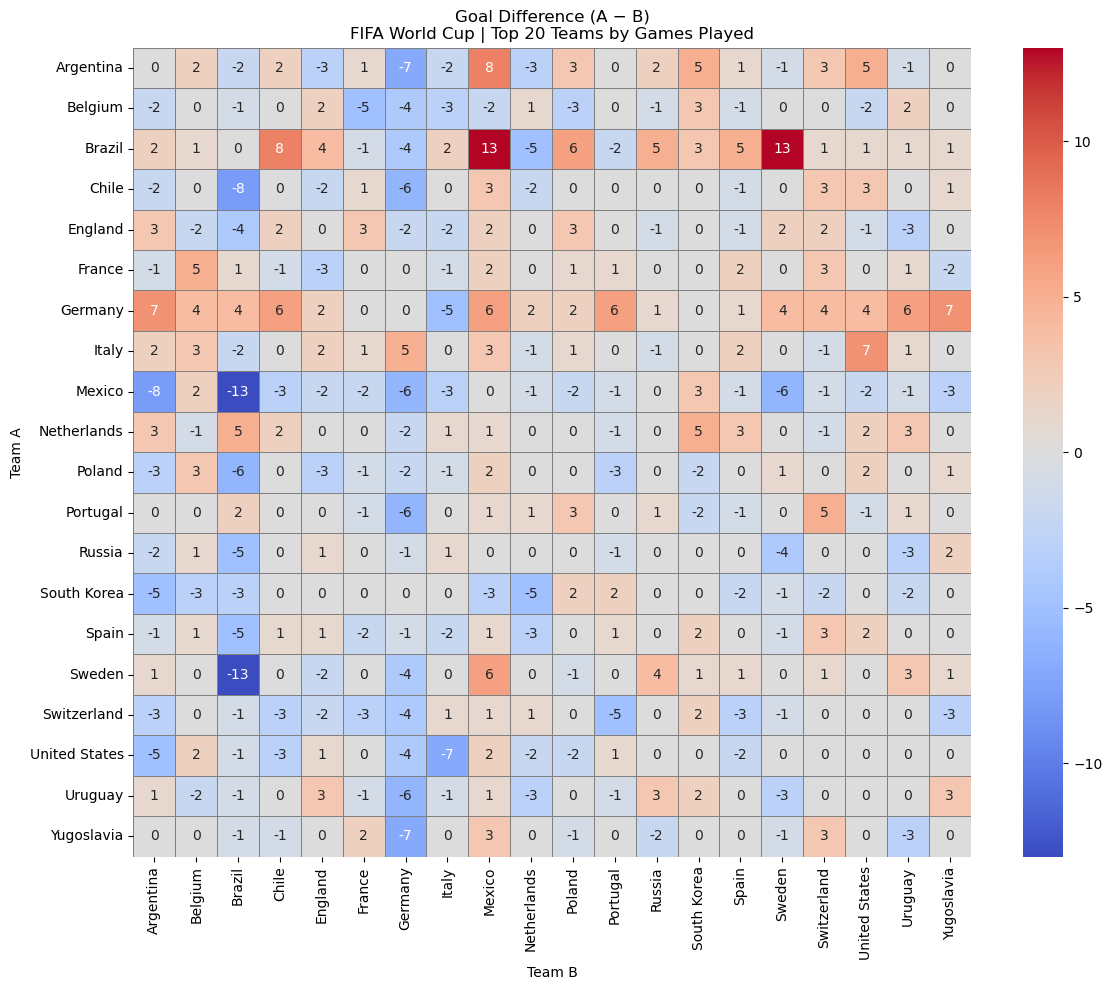

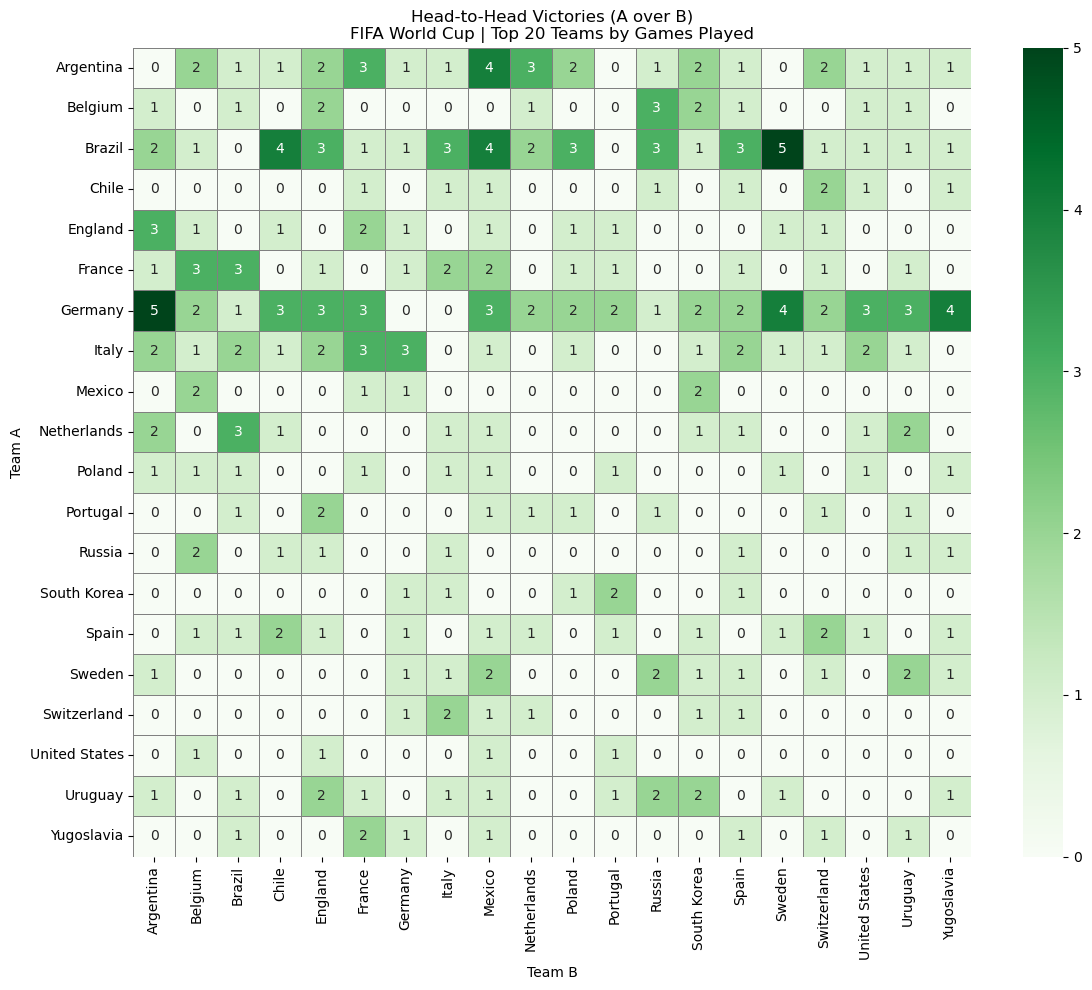

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- 0) Filter to FIFA World Cup finals only ----------
wc = df[df['tournament'] == 'FIFA World Cup'].copy()

# ---------- 1) Top-20 teams by games played ----------
games = wc['home_team'].value_counts().add(wc['away_team'].value_counts(), fill_value=0)
top20 = games.sort_values(ascending=False).head(20).index.tolist()

wc_top = wc[wc['home_team'].isin(top20) & wc['away_team'].isin(top20)].copy()

# ---------- 2) Long (directed) form ----------
a_side = wc_top[['home_team','away_team','home_score','away_score','winner']].rename(
    columns={'home_team':'team_a','away_team':'team_b',
             'home_score':'goals_a','away_score':'goals_b'}
)
b_side = wc_top[['away_team','home_team','away_score','home_score','winner']].rename(
    columns={'away_team':'team_a','home_team':'team_b',
             'away_score':'goals_a','home_score':'goals_b'}
)

long = pd.concat([a_side, b_side], ignore_index=True)

# ---------- 3) Flags & row metrics ----------
long['win']    = long['winner'] == long['team_a']          # did A win?
long['gd_row'] = long['goals_a'] - long['goals_b']         # goal diff A-B in that match

# ---------- 4) Aggregate to A vs B ----------
gd = (long.groupby(['team_a','team_b'], as_index=False)
          .agg(goal_diff=('gd_row','sum')))

wins_ab = (long.groupby(['team_a','team_b'], as_index=False)
                .agg(wins_vs=('win','sum')))

teams = sorted(set(long['team_a']).union(long['team_b']))

# ---------- 5) Pivot to matrices ----------
gd_matrix = (gd.pivot(index='team_a', columns='team_b', values='goal_diff')
               .fillna(0)
               .reindex(index=teams, columns=teams, fill_value=0))

win_matrix = (wins_ab.pivot(index='team_a', columns='team_b', values='wins_vs')
                 .fillna(0)
                 .reindex(index=teams, columns=teams, fill_value=0))

# Optional: zero diagonals
for t in teams:
    gd_matrix.loc[t, t] = 0
    win_matrix.loc[t, t] = 0

# ---------- 6) Plot ----------
plt.figure(figsize=(12,10))
sns.heatmap(gd_matrix, annot=True, fmt=".0f", cmap='coolwarm', center=0,
            linewidths=.5, linecolor='gray')
plt.title('Goal Difference (A − B)\nFIFA World Cup | Top 20 Teams by Games Played')
plt.xlabel('Team B'); plt.ylabel('Team A')
plt.tight_layout(); plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(win_matrix, annot=True, fmt=".0f", cmap='Greens',
            linewidths=.5, linecolor='gray')
plt.title('Head-to-Head Victories (A over B)\nFIFA World Cup | Top 20 Teams by Games Played')
plt.xlabel('Team B'); plt.ylabel('Team A')
plt.tight_layout(); plt.show()


In [14]:
df.tournament.value_counts().head(20)

tournament
Friendly                                18118
FIFA World Cup qualification             8419
UEFA Euro qualification                  2824
African Cup of Nations qualification     2278
FIFA World Cup                            964
Copa América                              869
AFC Asian Cup qualification               794
African Cup of Nations                    793
UEFA Nations League                       658
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Merdeka Tournament                        599
British Home Championship                 523
CONCACAF Nations League                   422
AFC Asian Cup                             421
Gold Cup                                  420
Gulf Cup                                  410
UEFA Euro                                 388
Island Games                              379
Asian Games                               368
Name: count, dtype: int64

               tour_cat  matches  avg_goals  med_goals  std_goals
0          Copa América      877   3.136830        3.0   2.114200
3      Other Tournament    16118   3.082144        3.0   2.284168
6  WC Qualifier – Other     8419   2.881459        3.0   2.029648
2              Friendly    18118   2.879512        3.0   2.015094
1        FIFA World Cup      964   2.821577        3.0   1.927371
4             UEFA Euro     3212   2.783935        3.0   1.768619
5   UEFA Nations League      658   2.512158        2.0   1.639692


C:\Users\jorgi\AppData\Local\Temp\ipykernel_19888\3791760278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
C:\Users\jorgi\AppData\Local\Temp\ipykernel_19888\3791760278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_goals'] = df['home_score'] + df['away_score']
C:\Users\jorgi\AppData\Local\Temp\ipykernel_19888\3791760278.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

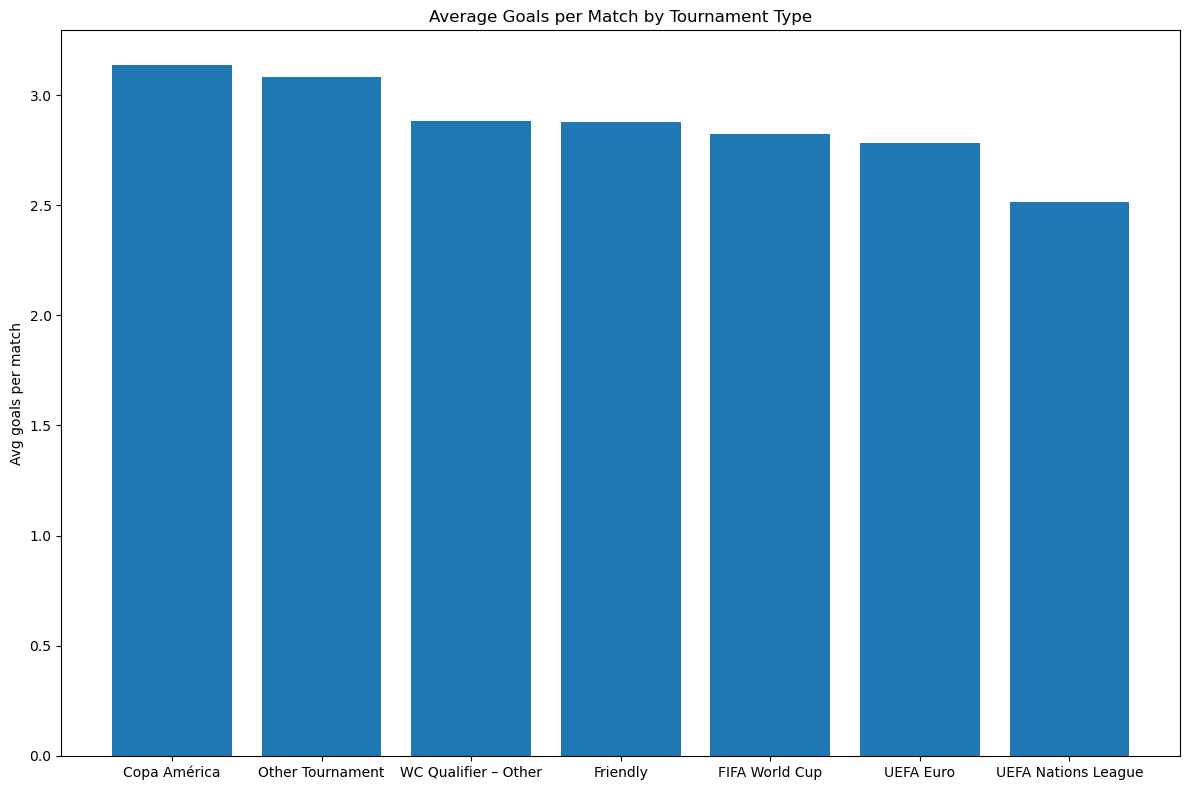

               tour_cat  avg_home  avg_away  avg_total
0          Copa América  1.881414  1.255416   3.136830
1        FIFA World Cup  1.567427  1.254149   2.821577
2              Friendly  1.692792  1.186720   2.879512
3      Other Tournament  1.862266  1.219878   3.082144
4             UEFA Euro  1.635741  1.148194   2.783935
5   UEFA Nations League  1.417933  1.094225   2.512158
6  WC Qualifier – Other  1.783704  1.097755   2.881459


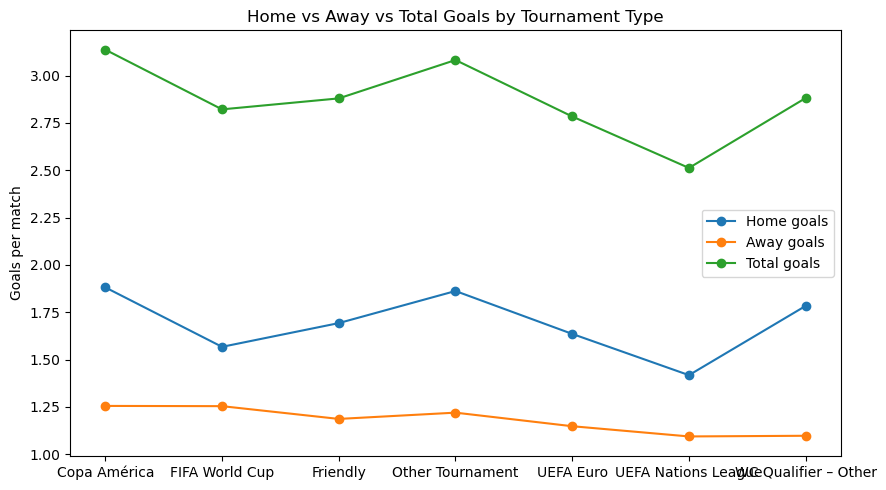

In [15]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['total_goals'] = df['home_score'] + df['away_score']

# 1) Categorize each match
def classify_tournament(t):
    t_low = str(t).lower()
    # Finals first
    if 'fifa world cup' in t_low and 'qualif' not in t_low:
        return 'FIFA World Cup'
    # Friendlies
    if 'friendly' in t_low:
        return 'Friendly'
    # Qualifiers by region
    if 'qualif' in t_low and 'fifa world cup' in t_low:
        if any(k in t_low for k in ['uefa', 'europe']):
            return 'WC Qualifier – Europe'
        if any(k in t_low for k in ['conmebol', 'america']):
            return 'WC Qualifier – Americas'
        return 'WC Qualifier – Other'
    # Specific tournaments
    if 'uefa nations league' in t_low:
        return 'UEFA Nations League'
    if 'copa américa' in t_low or 'copa america' in t_low:
        return 'Copa América'
    if 'uefa euro' in t_low:
        return 'UEFA Euro'
    return 'Other Tournament'

df['tour_cat'] = df['tournament'].apply(classify_tournament)

# 2) Aggregate stats
summary = (df.groupby('tour_cat', dropna=False)
             .agg(matches=('total_goals','size'),
                  avg_goals=('total_goals','mean'),
                  med_goals=('total_goals','median'),
                  std_goals=('total_goals','std'))
             .reset_index()
             .sort_values('avg_goals', ascending=False))

print(summary)

# 3) Plot average total goals per match (bar)
plt.figure(figsize=(12,8))
plt.bar(summary['tour_cat'], summary['avg_goals'])
plt.title('Average Goals per Match by Tournament Type')
plt.ylabel('Avg goals per match')
plt.xlabel('')
plt.tight_layout()
plt.show()

# 4) Optional: split home vs away averages
detail = (df.groupby('tour_cat', dropna=False)
            .agg(avg_home=('home_score','mean'),
                 avg_away=('away_score','mean'),
                 avg_total=('total_goals','mean'))
            .reset_index())

print(detail)

plt.figure(figsize=(9,5))
plt.plot(detail['tour_cat'], detail['avg_home'], marker='o', label='Home goals')
plt.plot(detail['tour_cat'], detail['avg_away'], marker='o', label='Away goals')
plt.plot(detail['tour_cat'], detail['avg_total'], marker='o', label='Total goals')
plt.title('Home vs Away vs Total Goals by Tournament Type')
plt.ylabel('Goals per match')
plt.xlabel('')
plt.legend()
plt.tight_layout()
plt.show()

# 5) Optional: distribution plot (boxplot)
# Uncomment if you have seaborn installed.
# import seaborn as sns
# plt.figure(figsize=(9,5))
# sns.boxplot(data=df, x='tour_cat', y='total_goals')
# plt.title('Distribution of Total Goals per Match')
# plt.xlabel('')
# plt.ylabel('Total goals')
# plt.tight_layout()
# plt.show()

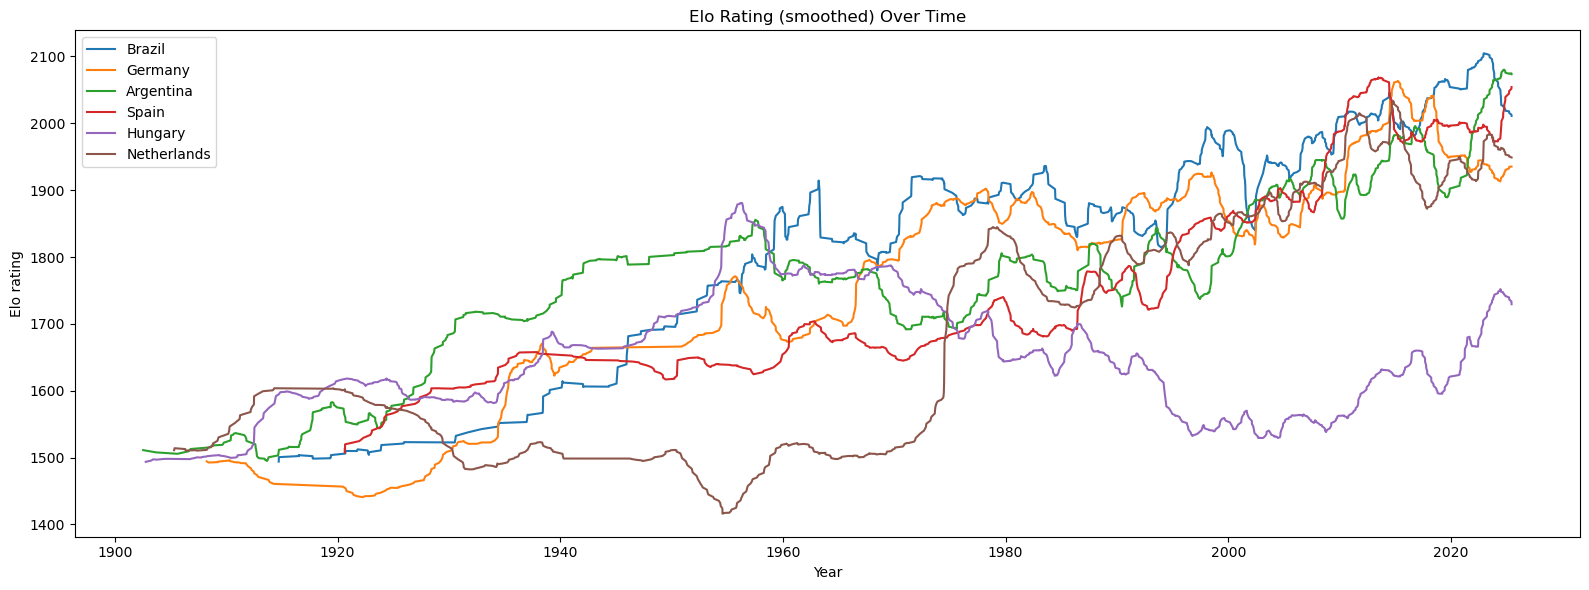

              team       rating
96630    Argentina  2076.566674
96539        Spain  2061.717111
96537       France  2027.500661
96640       Brazil  2004.115360
96538     Portugal  1978.218202
96596      England  1959.376529
96646  Netherlands  1953.770624
96631     Colombia  1926.987885
96536      Germany  1918.072401
96554      Croatia  1902.658044
96666        Japan  1900.250678
96668      Uruguay  1899.736454
96564      Belgium  1890.290699
96558        Italy  1881.367098
96731       Mexico  1874.812945
96635      Ecuador  1873.873427
96626         Iran  1861.555087
96622  South Korea  1848.537118
96556      Morocco  1845.336388
96592      Denmark  1835.170350


In [35]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# -------- Load & prep --------
# df must have: date, home_team, away_team, home_score, away_score, tournament, city, country, neutral (bool)
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.sort_values('date').reset_index(drop=True)

# Parameters
START_RATING   = 1500
K_BASE         = 20
HOME_ADVANTAGE = 100   # Elo points; set 0 if neutral flag is True
DRAW_VALUE     = 0.5

# Optional: bigger K for World Cup finals
def k_factor(row):
    if row['tournament'] == 'FIFA World Cup':
        return K_BASE * 1.8
    elif 'UEFA Nations League' in  str(row['tournament']).lower():
        return K_BASE * 1.5
    elif 'Copa América' in  str(row['tournament']).lower():
        return K_BASE * 1.5
    elif 'UEFA Euro' in  str(row['tournament']).lower():
        return K_BASE * 1.5
    elif 'African Cup of Nations' in  str(row['tournament']).lower():
        return K_BASE * 1.5
    elif 'qualification' in str(row['tournament']).lower():
        return K_BASE * 1.2
    elif 'friendly' in str(row['tournament']).lower():
        return K_BASE * 0.5
    else:
        return K_BASE

# Optional: scale by goal diff
def goal_weight(diff):
    # 1 for 1-goal win, 1.5 for 2-goal, 1.75 for 3+, etc. (FIFA-style)
    if diff <= 1:
        return 1
    elif diff == 2:
        return 1.5
    else:
        return 1.75

# Ratings store
ratings = defaultdict(lambda: START_RATING)

# To track history
history_rows = []

for i, row in df.iterrows():
    home, away   = row['home_team'], row['away_team']
    h_goals, a_goals = row['home_score'], row['away_score']
    date = row['date']
    neutral = row.get('neutral', False)  # dataset has neutral flag

    Ra = ratings[home]
    Rb = ratings[away]

    # Home advantage term
    H = 0 if neutral else HOME_ADVANTAGE

    # Expected scores
    Ea = 1 / (1 + 10 ** (-(Ra - (Rb) + H)/400))
    Eb = 1 - Ea

    # Actual results
    if h_goals > a_goals:
        Sa, Sb = 1.0, 0.0
    elif h_goals < a_goals:
        Sa, Sb = 0.0, 1.0
    else:
        Sa, Sb = DRAW_VALUE, DRAW_VALUE

    # K and goal diff weight
    K = k_factor(row)
    gw = goal_weight(abs(h_goals - a_goals))

    # Update ratings
    new_Ra = Ra + K * gw * (Sa - Ea)
    new_Rb = Rb + K * gw * (Sb - Eb)

    ratings[home] = new_Ra
    ratings[away] = new_Rb

    # Save history AFTER update (common choice). If you want pre-update, store Ra/Rb instead.
    history_rows.append({
        'date': date,
        'team': home,
        'rating': new_Ra
    })
    history_rows.append({
        'date': date,
        'team': away,
        'rating': new_Rb
    })

# Build history DataFrame
elo_history = pd.DataFrame(history_rows)

# Optional: smooth by rolling mean to reduce noise
elo_history['rating_smooth'] = (
    elo_history.groupby('team')['rating']
               .transform(lambda x: x.rolling(10, min_periods=1).mean())
)

# --------- Example: plot evolution for selected teams ----------
teams_to_plot = ['Brazil', 'Germany', 'Argentina', 'Spain', 'Hungary','Netherlands']
plot_df = elo_history[elo_history['team'].isin(teams_to_plot)]

plt.figure(figsize=(16,6))
for t in teams_to_plot:
    sub = plot_df[plot_df['team'] == t]
    plt.plot(sub['date'], sub['rating_smooth'], label=t)
plt.title('Elo Rating (smoothed) Over Time')
plt.ylabel('Elo rating')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()

# --------- Current top 20 Elo ----------
current = (elo_history.sort_values('date')
                        .groupby('team')
                        .tail(1)
                        .sort_values('rating', ascending=False)
                        .head(20))
print(current[['team','rating']])


In [17]:
df.columns

Index(['date', 'year', 'decade', 'home_team', 'away_team', 'home_score',
       'away_score', 'total_goals', 'winner', 'tournament', 'city', 'country',
       'neutral', 'home_win', 'tour_cat'],
      dtype='object')

In [18]:



continent_map = { 'Tunisia':'Africa','Ukraine':'Europe', 'South Korea':'Asia','Brazil':'America','Argentina':'America','Chile':'America','Colombia':'America','Costa Rica':'America','Cuba':'America','Dominican Republic':'America','Ecuador':'America','El Salvador':'America','Guatemala':'America','Haiti':'America','Honduras':'America','Jamaica':'America','Mexico':'America','Panama':'America','Paraguay':'America','Peru':'America','Trinidad and Tobago':'America','United States':'America','Uruguay':'America','Venezuela':'America','Bolivia':'America','Canada':'America','Guyana':'America','Suriname':'America','Bahamas':'America','Barbados':'America','Belize':'America','Grenada':'America','Saint Lucia':'America','Saint Vincent and the Grenadines':'America','Antigua and Barbuda':'America','Dominica':'America','Saint Kitts and Nevis':'America','Puerto Rico':'America','Aruba':'America','Bermuda':'America','French Guiana':'America','Martinique':'America','Algeria':'Africa','Angola':'Africa','Benin':'Africa','Botswana':'Africa','Burkina Faso':'Africa','Burundi':'Africa','Cameroon':'Africa','Cape Verde':'Africa','Central African Republic':'Africa','Chad':'Africa','Comoros':'Africa','Congo':'Africa','DR Congo':'Africa','Côte d\'Ivoire':'Africa','Equatorial Guinea':'Africa','Eswatini':'Africa','Ethiopia':'Africa','Gabon':'Africa','Gambia':'Africa','Ghana':'Africa','Guinea':'Africa','Guinea-Bissau':'Africa','Kenya':'Africa','Lesotho':'Africa','Liberia':'Africa','Libya':'Africa','Madagascar':'Africa','Malawi':'Africa','Mauritania':'Africa','Mauritius':'Africa','Morocco':'Africa','Mozambique':'Africa','Namibia':'Africa','Niger':'Africa','Nigeria':'Africa','Rwanda':'Africa','Senegal':'Africa','Seychelles':'Africa','Sierra Leone':'Africa','South Africa':'Africa','Sudan':'Africa','Tanzania':'Africa','Togo':'Africa','Uganda':'Africa','Zambia':'Africa','Zimbabwe':'Africa','Guadeloupe':'America','Curaçao':'America','Germany':'Europe','France':'Europe','Italy':'Europe','Spain':'Europe','England':'Europe','Scotland':'Europe','Wales':'Europe','Northern Ireland':'Europe','Netherlands':'Europe','Belgium':'Europe','Portugal':'Europe','Russia':'Europe','Sweden':'Europe','Norway':'Europe','Denmark':'Europe','Finland':'Europe','Poland':'Europe','Austria':'Europe','Greece':'Europe','Czech Republic':'Europe','Slovakia':'Europe','Hungary':'Europe','Romania':'Europe','Croatia':'Europe','Serbia':'Europe','Slovenia':'Europe','Bosnia and Herzegovina':'Europe','Albania':'Europe','North Macedonia':'Europe','Montenegro':'Europe','Belarus':'Europe','Lithuania':'Europe','Latvia':'Europe','Estonia':'Europe','Iceland':'Europe','Ireland':'Europe','Luxembourg':'Europe','Malta':'Europe','Cyprus':'Europe','Andorra':'Europe','Armenia':'Europe','Azerbaijan':'Europe','Georgia':'Europe','Liechtenstein':'Europe','San Marino':'Europe','Vatican City':'Europe','Alderney':'Europe','Bulgaria':'Europe','Czechoslovakia':'Europe','German DR':'Europe','Gibraltar':'Europe','Guernsey':'Europe','Jersey':'Europe','Republic of Ireland':'Europe','Switzerland':'Europe','Faroe Islands':'Europe','Yugoslavia':'Europe','Afghanistan':'Asia','Bangladesh':'Asia','Brunei':'Asia','Cambodia':'Asia','China PR':'Asia','India':'Asia','Indonesia':'Asia','Iran':'Asia','Iraq':'Asia','Israel':'Asia','Japan':'Asia','Jordan':'Asia','Kazakhstan':'Asia','Kuwait':'Asia','Kyrgyzstan':'Asia','Laos':'Asia','Lebanon':'Asia','Macau':'Asia','Maldives':'Asia','Myanmar':'Asia','Nepal':'Asia','North Korea':'Asia','Oman':'Asia','Pakistan':'Asia','Palestine':'Asia','Philippines':'Asia','Qatar':'Asia','Saudi Arabia':'Asia','Singapore':'Asia','Sri Lanka':'Asia','Syria':'Asia','Taiwan':'Asia','Tajikistan':'Asia','Thailand':'Asia','Turkey':'Europe','Turkmenistan':'Asia','United Arab Emirates':'Asia','Uzbekistan':'Asia','Vietnam':'Asia','Vietnam Republic':'Asia','Yemen':'Asia','Australia':'Oceania','New Zealand':'Oceania','Fiji':'Oceania','New Caledonia':'Oceania','Papua New Guinea':'Oceania','Solomon Islands':'Oceania','Tahiti':'Oceania','Vanuatu':'Oceania' , 'Egypt':'Africa','Ivory Coast':'Africa','Moldova':'Europe' , 'Bahrain':'Asia','Hong Kong':'Asia','Malaysia':'Asia','Mali':'Africa', 'Abkhazia':'Europe','Ambazonia':'Africa','American Samoa':'Oceania','Andalusia':'Europe','Anguilla':'America','Arameans Suryoye':'Asia','Artsakh':'Asia','Asturias':'Europe','Aymara':'America','Barawa':'Africa','Basque Country':'Europe','Bhutan':'Asia','Biafra':'Africa','Bonaire':'America','British Virgin Islands':'America','Brittany':'Europe','Canary Islands':'Europe','Cascadia':'America','Catalonia':'Europe','Cayman Islands':'America','Central Spain':'Europe','Chagos Islands':'Asia','Chameria':'Europe','Chechnya':'Europe','Cilento':'Europe','Cook Islands':'Oceania','Corsica':'Europe','County of Nice':'Europe','Crimea':'Europe','Darfur':'Africa','Djibouti':'Africa','Donetsk PR':'Europe','Délvidék':'Europe','Elba Island':'Europe','Ellan Vannin':'Europe','Eritrea':'Africa','Falkland Islands':'America','Felvidék':'Europe','Franconia':'Europe','Frøya':'Europe','Galicia':'Europe','Gotland':'Europe','Gozo':'Europe','Greenland':'America','Guam':'Oceania','Găgăuzia':'Europe','Hitra':'Europe','Hmong':'Asia','Iraqi Kurdistan':'Asia','Isle of Man':'Europe','Isle of Wight':'Europe','Kabylia':'Africa','Kernow':'Europe','Kiribati':'Oceania','Kosovo':'Europe','Kárpátalja':'Europe','Luhansk PR':'Europe','Madrid':'Europe','Manchukuo':'Asia','Mapuche':'America','Matabeleland':'Africa','Maule Sur':'America','Mayotte':'Africa','Menorca':'Europe','Micronesia':'Oceania','Monaco':'Europe','Mongolia':'Asia','Montserrat':'America','Nicaragua':'America','Niue':'Oceania','North Vietnam':'Asia','Northern Cyprus':'Asia','Northern Mariana Islands':'Oceania','Occitania':'Europe','Orkney':'Europe','Padania':'Europe','Palau':'Oceania','Panjab':'Asia','Parishes of Jersey':'Europe','Provence':'Europe','Raetia':'Europe','Republic of St. Pauli':'Europe','Rhodes':'Europe','Romani people':'Europe','Ryūkyū':'Asia','Réunion':'Africa','Saare County':'Europe','Saarland':'Europe','Saint Barthélemy':'America','Saint Helena':'Africa','Saint Martin':'America','Saint Pierre and Miquelon':'America','Samoa':'Oceania','Sark':'Europe','Saugeais':'Europe','Sealand':'Europe','Seborga':'Europe','Shetland':'Europe','Silesia':'Europe','Sint Maarten':'America','Somalia':'Africa','Somaliland':'Africa','South Ossetia':'Asia','South Sudan':'Africa','South Yemen':'Asia','Surrey':'Europe','Székely Land':'Europe','Sápmi':'Europe','São Tomé and Príncipe':'Africa','Tamil Eelam':'Asia','Tibet':'Asia','Ticino':'Europe','Timor-Leste':'Asia','Tonga':'Oceania','Turks and Caicos Islands':'America','Tuvalu':'Oceania','Two Sicilies':'Europe','United Koreans in Japan':'Asia','United States Virgin Islands':'America','Wallis Islands and Futuna':'Oceania','West Papua':'Oceania','Western Armenia':'Asia','Western Australia':'Oceania','Western Isles':'Europe','Western Sahara':'Africa','Yemen DPR':'Asia','Ynys Môn':'Europe','Yorkshire':'Europe','Yoruba Nation':'Africa','Zanzibar':'Africa','Åland Islands':'Europe'}



df['home_continent'] = df['home_team'].map(continent_map)
df['away_continent'] = df['away_team'].map(continent_map)





In [19]:
df

,date,year,decade,home_team,away_team,home_score,away_score,total_goals,winner,tournament,city,country,neutral,home_win,tour_cat,home_continent,away_continent
0,1872-11-30,1872,1870,Scotland,England,0,0,0,Draw,Friendly,Glasgow,Scotland,False,False,Friendly,Europe,Europe
1,1873-03-08,1873,1870,England,Scotland,4,2,6,England,Friendly,London,England,False,True,Friendly,Europe,Europe
2,1874-03-07,1874,1870,Scotland,England,2,1,3,Scotland,Friendly,Glasgow,Scotland,False,True,Friendly,Europe,Europe
3,1875-03-06,1875,1870,England,Scotland,2,2,4,Draw,Friendly,London,England,False,False,Friendly,Europe,Europe
4,1876-03-04,1876,1870,Scotland,England,3,0,3,Scotland,Friendly,Glasgow,Scotland,False,True,Friendly,Europe,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48361,2025-06-29,2025,2020,Canada,Guatemala,1,1,2,Guatemala,Gold Cup,Minneapolis,United States,True,False,Other Tournament,America,America
48362,2025-06-29,2025,2020,United States,Costa Rica,2,2,4,United States,Gold Cup,Minneapolis,United States,False,False,Other Tournament,America,America
48363,2025-07-02,2025,2020,Mexico,Honduras,1,0,1,Mexico,Gold Cup,Santa Clara,United States,True,True,Other Tournament,America,America
48364,2025-07-02,2025,2020,United States,Guatemala,2,1,3,United States,Gold Cup,St. Louis,United States,False,True,Other Tournament,America,America


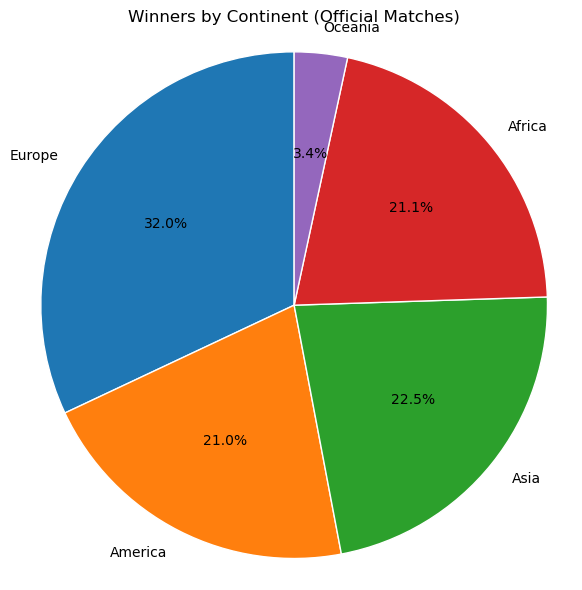

In [56]:


# 1) Filter to non‑friendly matches
df_nf = df[~df['tournament'].str.contains('friendly', case=False, na=False)].copy()

# 2) Determine winner’s continent
df_nf['winner_continent'] = np.where(
    df_nf['winner'] == 'Draw', 'Draw',
    np.where(
        df_nf['winner'] == df_nf['home_team'],
        df_nf['home_continent'],
        df_nf['away_continent']
    )
)

# 3) Tally wins (exclude draws)
wins_by_cont = (
    df_nf[df_nf['winner_continent'] != 'Draw']
      .groupby('winner_continent')
      .size()
      .rename('wins')
      .to_frame()
)

# 4) Reindex into the exact slice order you want
desired_order = ['Europe','America','Asia','Africa','Oceania']
wins_by_cont = (
    wins_by_cont
      .reindex(desired_order, fill_value=0)
      .reset_index()
)

# 5) Drop zeros if you don’t want blank slices
wins_by_cont = wins_by_cont[wins_by_cont['wins'] > 0]

# 6) Plot—no colors argument, so defaults apply in this new order
plt.figure(figsize=(6,6))
plt.pie(
    wins_by_cont['wins'],
    labels     = wins_by_cont['winner_continent'],
    autopct    = '%1.1f%%',
    startangle = 90,
    wedgeprops = dict(edgecolor='white')
)
plt.title('Winners by Continent (Official Matches)')
plt.axis('equal')
plt.tight_layout()
plt.show()



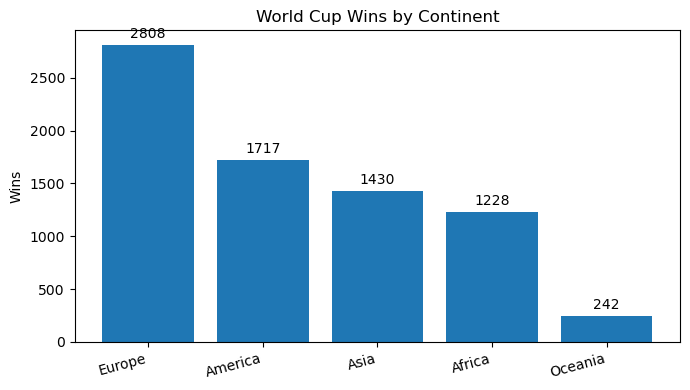

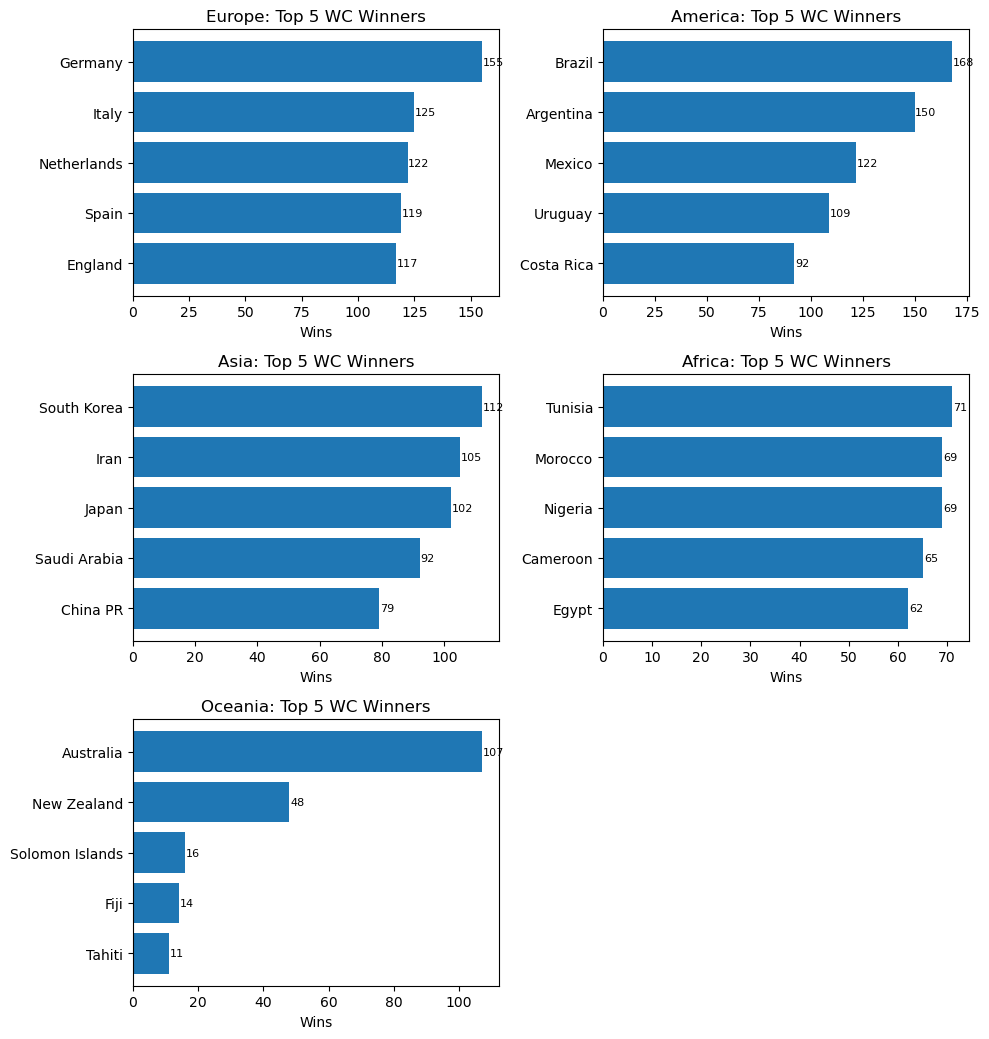

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- 1) Filter to World Cup matches ----------
wc = df[df['tournament'].str.contains('fifa world cup', case=False, na=False)].copy()

# Winner continent using your existing columns
wc['winner_continent'] = np.where(
    wc['winner'] == 'Draw', 'Draw',
    np.where(wc['winner'] == wc['home_team'], wc['home_continent'], wc['away_continent'])
)

# Keep wins only
wc_wins = wc[wc['winner_continent'] != 'Draw'].copy()

# ---------- 2) Totals by continent ----------
wins_by_cont = (wc_wins.groupby('winner_continent')
                        .size()
                        .rename('wins')
                        .reset_index()
                        .sort_values('wins', ascending=False))
continents = wins_by_cont['winner_continent'].tolist()

# ---------- 3) Top-5 teams per continent ----------
top5_rows = []
for cont, g in wc_wins.groupby('winner_continent'):
    top5 = (g.groupby('winner').size()
            .sort_values(ascending=False)
            .head(5))
    top5_rows.append(
        pd.DataFrame({'winner_continent': cont,
                      'team': top5.index,
                      'wins': top5.values,
                      'rank': range(1, len(top5)+1)})
    )
top5_df = pd.concat(top5_rows, ignore_index=True)

# ---------- 4) Plot ----------
# Figure 1: total wins bar (continent level)
fig, ax = plt.subplots(figsize=(7,4))
bars = ax.bar(wins_by_cont['winner_continent'], wins_by_cont['wins'])
ax.set_title('World Cup Wins by Continent')
ax.set_ylabel('Wins')
ax.set_xlabel('')
ax.bar_label(bars, fmt='%d', padding=3)
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

# Figure 2: small-multiple bars (top 5 teams each continent)
n_cont = len(continents)
cols = 2
rows = int(np.ceil(n_cont / cols))
fig, axs = plt.subplots(rows, cols, figsize=(10, 3.5*rows), sharex=False)

for i, cont in enumerate(continents):
    r, c = divmod(i, cols)
    ax = axs[r, c] if rows > 1 else axs[c]
    sub = top5_df[top5_df['winner_continent'] == cont].sort_values('wins')
    ax.barh(sub['team'], sub['wins'])
    ax.set_title(f'{cont}: Top 5 WC Winners')
    ax.set_xlabel('Wins')
    ax.set_ylabel('')
    for y, v in zip(sub['team'], sub['wins']):
        ax.text(v + 0.3, y, str(v), va='center', fontsize=8)
# Hide empty subplot if any
if n_cont % cols != 0:
    axs.flat[-1].set_visible(False)

plt.tight_layout()
plt.show()


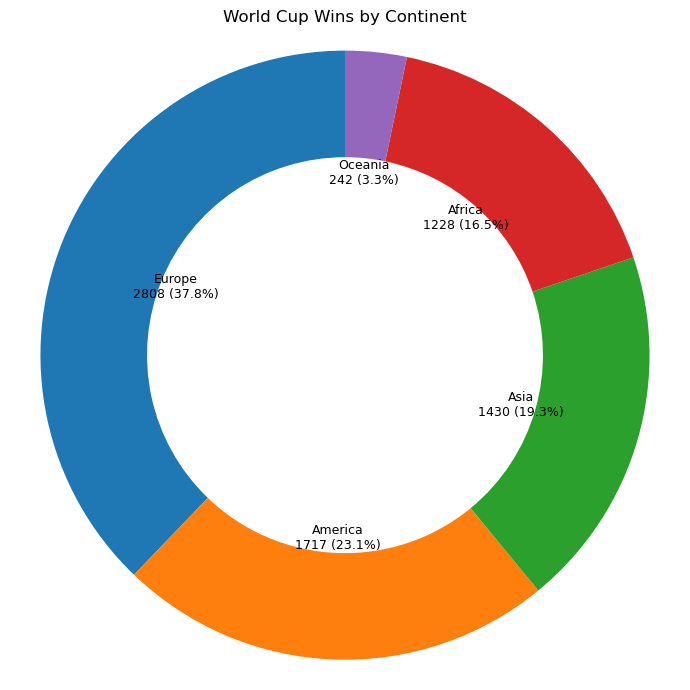

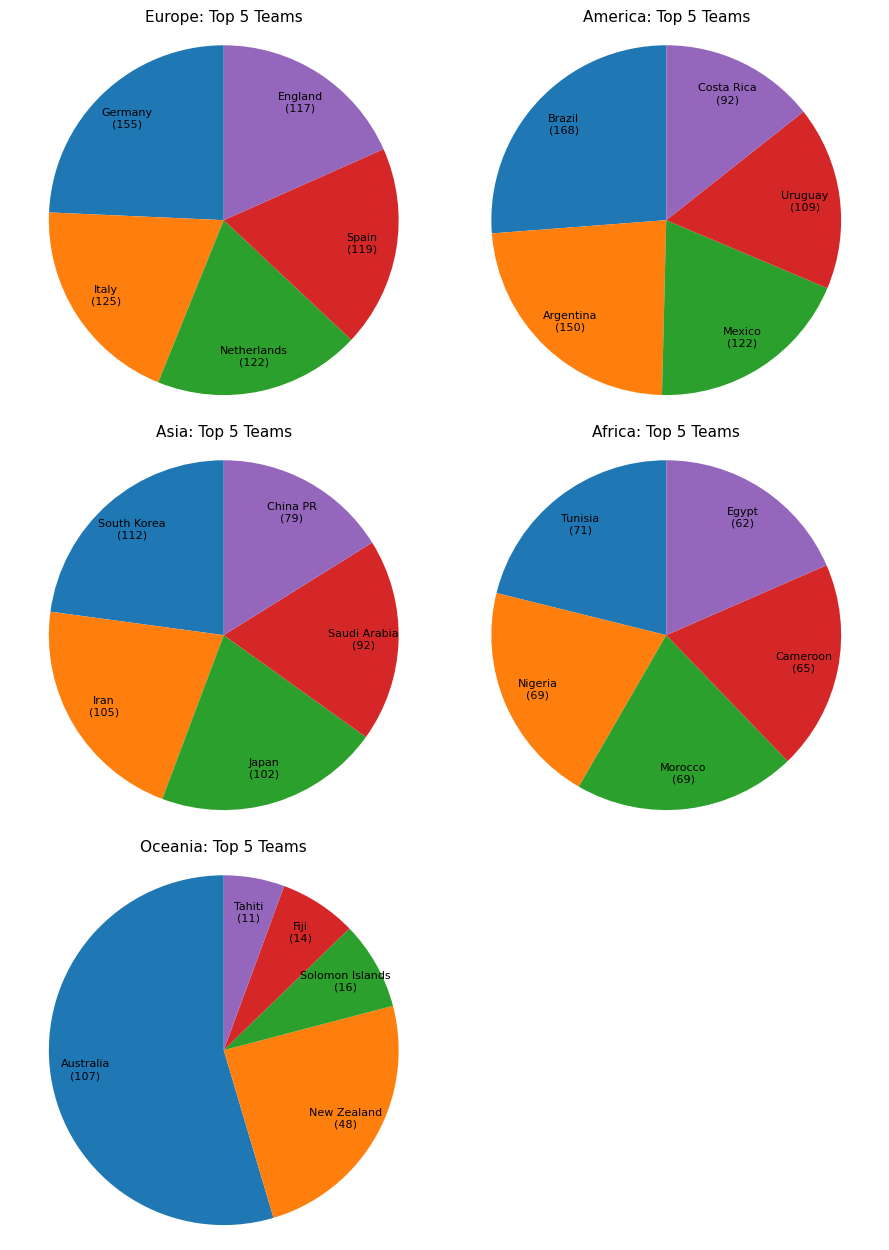

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------- 0) Filter to World Cup matches (finals + qualifiers if present) --------
wc = df[df['tournament'].str.contains('fifa world cup', case=False, na=False)].copy()

# -------- 1) Winner continent using your existing columns --------
wc['winner_continent'] = np.where(
    wc['winner'] == 'Draw', 'Draw',
    np.where(wc['winner'] == wc['home_team'], wc['home_continent'], wc['away_continent'])
)

# keep wins only
wc_wins = wc[wc['winner_continent'] != 'Draw'].copy()

# -------- 2) Totals by continent --------
wins_by_cont = (wc_wins.groupby('winner_continent')
                        .size()
                        .rename('wins')
                        .reset_index()
                        .sort_values('wins', ascending=False))
continents = wins_by_cont['winner_continent'].tolist()

# -------- 3) Top 5 teams per continent (with counts) --------
top5_rows = []
for cont, g in wc_wins.groupby('winner_continent'):
    top5 = (g.groupby('winner').size()
            .sort_values(ascending=False)
            .head(5))
    top5_rows.append(
        pd.DataFrame({
            'winner_continent': cont,
            'team': top5.index,
            'wins': top5.values
        })
    )
top5_df = pd.concat(top5_rows, ignore_index=True)

# =================== 4) BIG DONUT PIE (continent totals) ===================
fig, ax = plt.subplots(figsize=(7,7))
vals = wins_by_cont['wins'].values
labels = wins_by_cont['winner_continent'].values

wedges, _ = ax.pie(vals, startangle=90, labels=None,
                   wedgeprops=dict(width=0.35))  # donut

total = vals.sum()
for w, cont, v in zip(wedges, labels, vals):
    ang = (w.theta2 + w.theta1) / 2
    x = np.cos(np.deg2rad(ang)) * 0.6
    y = np.sin(np.deg2rad(ang)) * 0.6
    ax.text(x, y, f"{cont}\n{v} ({v/total:.1%})",
            ha='center', va='center', fontsize=9)

ax.set_title('World Cup Wins by Continent')
ax.axis('equal')
plt.tight_layout()
plt.show()

# =================== 5) SMALL PIES: top-5 teams per continent ===================
n = len(continents)
cols = 2
rows = int(np.ceil(n/cols))
fig, axs = plt.subplots(rows, cols, figsize=(9, 4.2*rows))

for i, cont in enumerate(continents):
    r, c = divmod(i, cols)
    ax = axs[r, c] if rows > 1 else axs[c]
    sub = top5_df[top5_df['winner_continent'] == cont]

    # If fewer than 5 teams, just plot what's there
    vals2 = sub['wins'].values
    labels2 = sub['team'].values

    wedges2, _ = ax.pie(vals2, startangle=90, labels=None, autopct=None)
    ax.set_title(f"{cont}: Top 5 Teams", fontsize=11)
    ax.axis('equal')

    # put team names & counts outside slices
    # (you can switch to 'autopct' if you prefer percentages)
    for w, lab, v in zip(wedges2, labels2, vals2):
        ang = (w.theta2 + w.theta1) / 2
        x = np.cos(np.deg2rad(ang)) * 0.8
        y = np.sin(np.deg2rad(ang)) * 0.8
        ax.text(x, y, f"{lab}\n({v})", ha='center', va='center', fontsize=8)

# hide any extra subplot if needed
for j in range(i+1, rows*cols):
    axs.flat[j].set_visible(False)

plt.tight_layout()
plt.show()


In [23]:
df.columns

Index(['date', 'year', 'decade', 'home_team', 'away_team', 'home_score',
       'away_score', 'total_goals', 'winner', 'tournament', 'city', 'country',
       'neutral', 'home_win', 'tour_cat', 'home_continent', 'away_continent'],
      dtype='object')

In [26]:
wins = df[(df['winner'] != 'Draw') & (df['tournament'] != 'Friendly')].copy()

# 2) Flag home vs away win
wins['home_win_flag'] = wins['winner'] == wins['home_team']

# 3) Aggregate per winning team
agg = (
    wins
    .groupby('winner')
    .agg(
        total_wins          = ('winner', 'size'),
        home_continent_wins = ('home_win_flag', 'sum')
    )
    .reset_index()
)
agg['away_continent_wins'] = agg['total_wins'] - agg['home_continent_wins']

# 4) View top teams
top_home = agg.sort_values('home_continent_wins', ascending=False).head(10)
top_away = agg.sort_values('away_continent_wins', ascending=False).head(10)

In [27]:
top_home

,winner,total_wins,home_continent_wins,away_continent_wins
11,Argentina,397,292,105
34,Brazil,376,263,113
237,South Korea,403,241,162
77,England,387,216,171
255,Thailand,288,203,85
151,Malaysia,267,192,75
163,Mexico,295,186,109
128,Japan,286,180,106
223,Scotland,293,176,117
74,Egypt,238,175,63


In [28]:
top_away

,winner,total_wins,home_continent_wins,away_continent_wins
77,England,387,216,171
237,South Korea,403,241,162
272,Uruguay,305,164,141
244,Sweden,288,166,122
240,Spain,277,157,120
95,Germany,284,166,118
223,Scotland,293,176,117
34,Brazil,376,263,113
125,Italy,280,170,110
289,Zambia,229,120,109


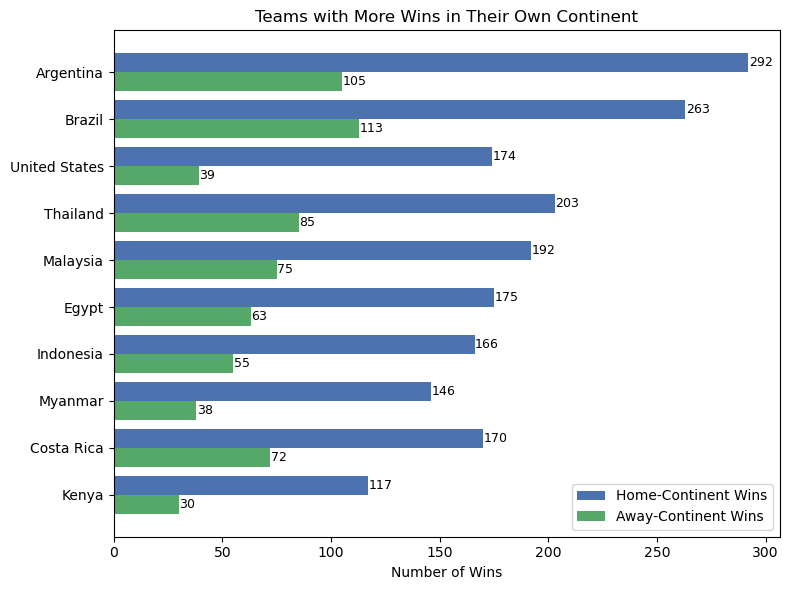

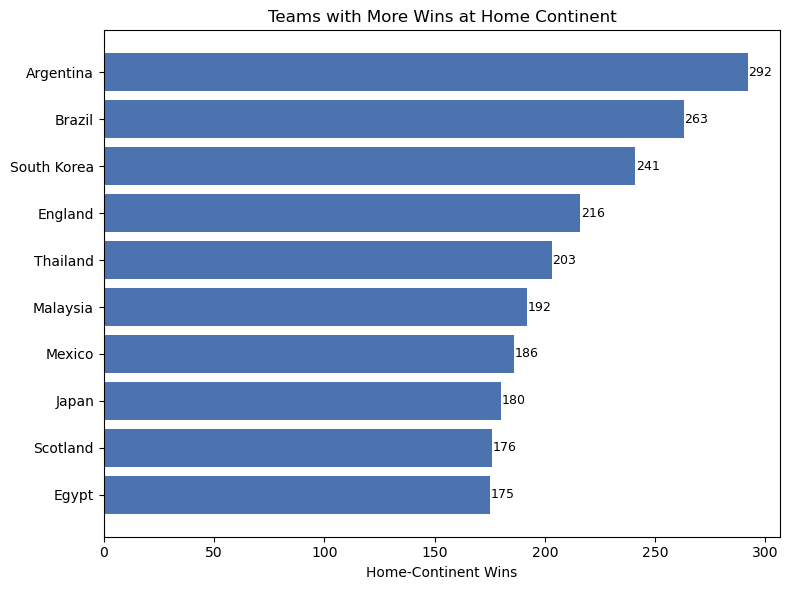

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have `agg` from before with columns:
#   ['winner', 'total_wins', 'home_continent_wins', 'away_continent_wins']

# 1) Filter to teams with more wins in their own continent than away
dominant = agg[agg['home_continent_wins'] > agg['away_continent_wins']].copy()

# 2) Sort by how dominant they are (difference) or by home wins
dominant['diff'] = dominant['home_continent_wins'] - dominant['away_continent_wins']
dominant = dominant.sort_values('diff', ascending=False)

# 3) (Optional) take top N
top_n = 10
plot_df = dominant.head(top_n).set_index('winner')

# 4) Plot grouped horizontal bars
teams = plot_df.index.tolist()
home = plot_df['home_continent_wins']
away = plot_df['away_continent_wins']
y = np.arange(len(teams))
bar_w = 0.4

fig, ax = plt.subplots(figsize=(8, 0.5*len(teams) + 1))
ax.barh(y - bar_w/2, home, bar_w, label='Home‑Continent Wins', color='#4c72b0')
ax.barh(y + bar_w/2, away, bar_w, label='Away‑Continent Wins', color='#55a868')

ax.set_yticks(y)
ax.set_yticklabels(teams)
ax.invert_yaxis()
ax.set_xlabel('Number of Wins')
ax.set_title('Teams with More Wins in Their Own Continent')
ax.legend()

# Annotate exact values
for i, (h, a) in enumerate(zip(home, away)):
    ax.text(h + 0.2, y[i] - bar_w/2, str(int(h)), va='center', fontsize=9)
    ax.text(a + 0.2, y[i] + bar_w/2, str(int(a)), va='center', fontsize=9)

plt.tight_layout()
plt.show()
import matplotlib.pyplot as plt
import numpy as np

# 1) Filter to teams with more home‑continent wins than away‑continent wins
dominant = agg[agg['home_continent_wins'] > agg['away_continent_wins']].copy()

# 2) Sort by home‑continent wins descending
dominant = dominant.sort_values('home_continent_wins', ascending=False)

# 3) (Optional) limit to top N
top_n = 10
plot_df = dominant.head(top_n).set_index('winner')

# 4) Plot horizontal bar of home‑continent wins only
teams = plot_df.index.tolist()
home_wins = plot_df['home_continent_wins'].values
y = np.arange(len(teams))

plt.figure(figsize=(8, 0.5*len(teams) + 1))
plt.barh(y, home_wins, color='#4c72b0')
plt.yticks(y, teams)
plt.gca().invert_yaxis()  # highest at top
plt.xlabel('Home‑Continent Wins')
plt.title('Teams with More Wins at Home Continent')
# Annotate values on bars
for i, v in enumerate(home_wins):
    plt.text(v + 0.2, y[i], str(int(v)), va='center', fontsize=9)

plt.tight_layout()
plt.show()



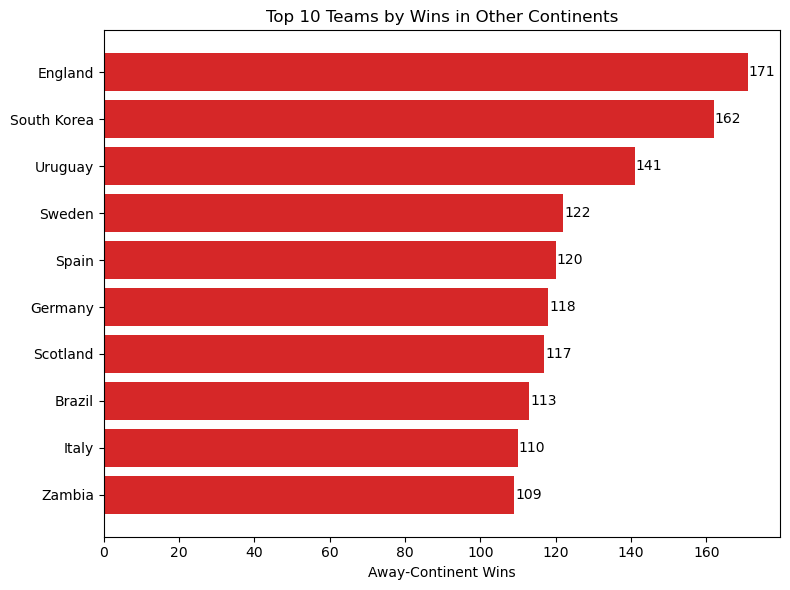

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 1) Rank teams by away_continent_wins (regardless of home wins)
top_away = agg.sort_values('away_continent_wins', ascending=False).head(10).copy()
top_away = top_away.set_index('winner')

# 2) Extract for plotting
teams     = top_away.index.tolist()
away_wins = top_away['away_continent_wins'].values
y_pos     = np.arange(len(teams))

# 3) Plot horizontal bar
plt.figure(figsize=(8, 0.5*len(teams) + 1))
plt.barh(y_pos, away_wins, color='#d62728')
plt.yticks(y_pos, teams)
plt.gca().invert_yaxis()
plt.xlabel('Away‑Continent Wins')
plt.title('Top 10 Teams by Wins in Other Continents')

# 4) Annotate exact numbers
for i, v in enumerate(away_wins):
    plt.text(v + 0.2, y_pos[i], str(int(v)), va='center')

plt.tight_layout()
plt.show()



In [36]:

# 2) Filter to non‑friendly wins
wins = df[
    (df['winner'] != 'Draw') &
    (df['tournament'] != 'Friendly')
].copy()

# 3) Flag home vs away wins
wins['home_win_flag'] = wins['winner'] == wins['home_team']

# 4) Aggregate per decade and team
agg = (
    wins
    .groupby(['decade','winner'])
    .agg(
        total_wins           = ('winner','size'),
        home_continent_wins  = ('home_win_flag','sum')
    )
    .reset_index()
)
agg['away_continent_wins'] = agg['total_wins'] - agg['home_continent_wins']

# 5) Find the best team each decade by home‑continent wins
best_home = agg.loc[
    agg.groupby('decade')['home_continent_wins'].idxmax()
].sort_values('decade')

# 6) Find the best team each decade by away‑continent wins
best_away = agg.loc[
    agg.groupby('decade')['away_continent_wins'].idxmax()
].sort_values('decade')

In [37]:
best_home

,decade,winner,total_wins,home_continent_wins,away_continent_wins
2,1880,Scotland,14,7,7
4,1890,England,24,13,11
10,1900,England,18,10,8
39,1910,Uruguay,23,15,8
42,1920,Argentina,33,29,4
101,1930,Hungary,17,13,4
129,1940,Argentina,36,30,6
177,1950,Brazil,50,37,13
315,1960,Myanmar,41,34,7
446,1970,Malaysia,100,63,37


In [38]:
best_away

,decade,winner,total_wins,home_continent_wins,away_continent_wins
2,1880,Scotland,14,7,7
4,1890,England,24,13,11
10,1900,England,18,10,8
39,1910,Uruguay,23,15,8
75,1920,Uruguay,33,17,16
120,1930,Sweden,22,11,11
168,1940,Uruguay,24,8,16
239,1950,Uruguay,30,6,24
362,1960,Vietnam Republic,46,23,23
485,1970,South Korea,108,60,48


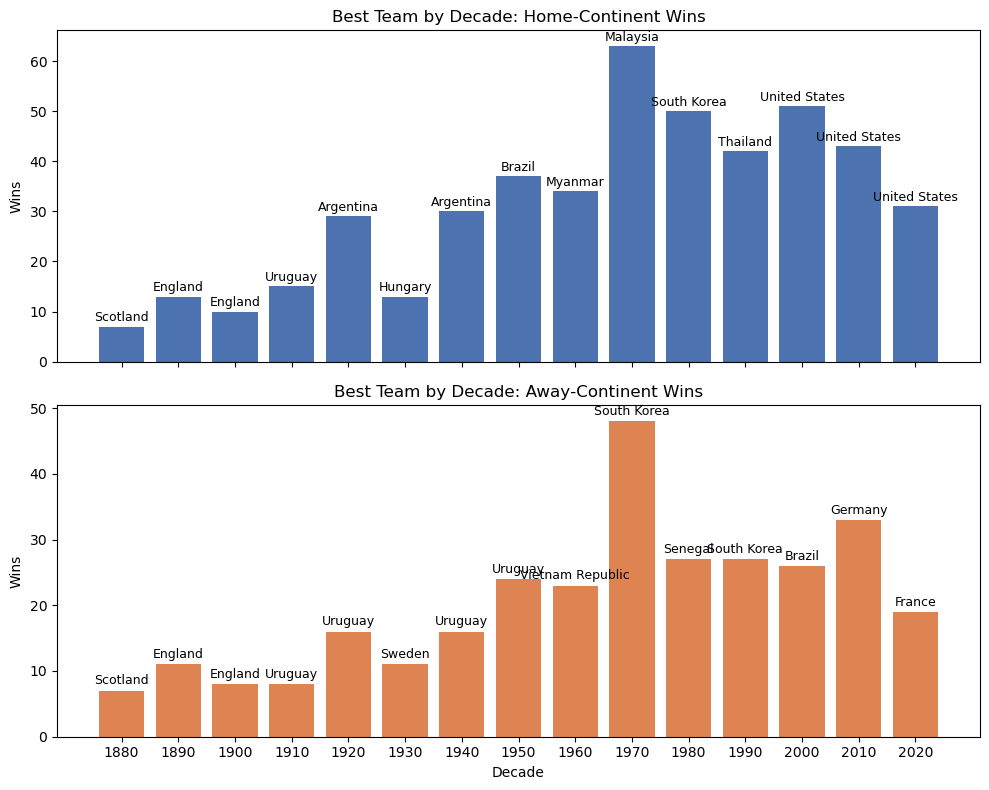

In [39]:
import matplotlib.pyplot as plt

# prepare string decades for x‐ticks
decades_home = best_home['decade'].astype(str)
wins_home   = best_home['home_continent_wins']
teams_home  = best_home['winner']

decades_away = best_away['decade'].astype(str)
wins_away   = best_away['away_continent_wins']
teams_away  = best_away['winner']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# ---- Home‐continent wins ----
ax1.bar(decades_home, wins_home, color='#4c72b0')
for x, y, team in zip(decades_home, wins_home, teams_home):
    ax1.text(x, y + 0.5, team, ha='center', va='bottom', fontsize=9)
ax1.set_title('Best Team by Decade: Home‑Continent Wins')
ax1.set_ylabel('Wins')

# ---- Away‐continent wins ----
ax2.bar(decades_away, wins_away, color='#dd8452')
for x, y, team in zip(decades_away, wins_away, teams_away):
    ax2.text(x, y + 0.5, team, ha='center', va='bottom', fontsize=9)
ax2.set_title('Best Team by Decade: Away‑Continent Wins')
ax2.set_xlabel('Decade')
ax2.set_ylabel('Wins')

plt.tight_layout()
plt.show()


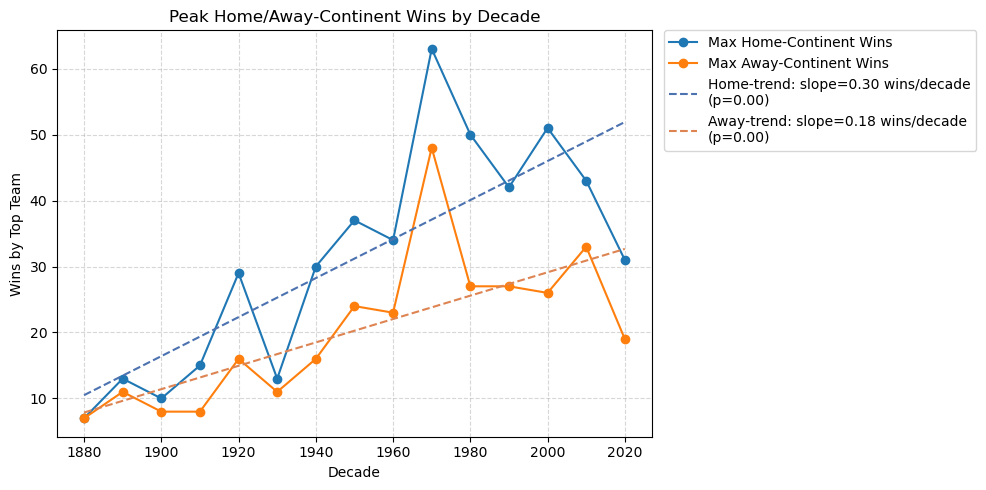

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Assume best_home and best_away from your previous code:
#   best_home: columns ['decade','winner','home_continent_wins']
#   best_away: columns ['decade','winner','away_continent_wins']

# 1) Plot the raw counts
fig, ax = plt.subplots(figsize=(10,5))

# Home‐continent champions
ax.plot(best_home['decade'], best_home['home_continent_wins'],
        marker='o', label='Max Home‑Continent Wins')

# Away‐continent champions
ax.plot(best_away['decade'], best_away['away_continent_wins'],
        marker='o', label='Max Away‑Continent Wins')

ax.set_xlabel('Decade')
ax.set_ylabel('Wins by Top Team')
ax.set_title('Peak Home/Away‑Continent Wins by Decade')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

# 2) Fit & plot simple linear trends
for series, label, color in [
    (best_home['home_continent_wins'], 'Home‑trend', '#4c72b0'),
    (best_away['away_continent_wins'], 'Away‑trend','#dd8452')
]:
    x = best_home['decade'] if label.startswith('Home') else best_away['decade']
    y = series
    slope, intercept, r, p, se = linregress(x, y)
    ax.plot(x, intercept + slope*x, linestyle='--', color=color, 
            label=f"{label}: slope={slope:.2f} wins/decade\n(p={p:.2f})")

ax.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()



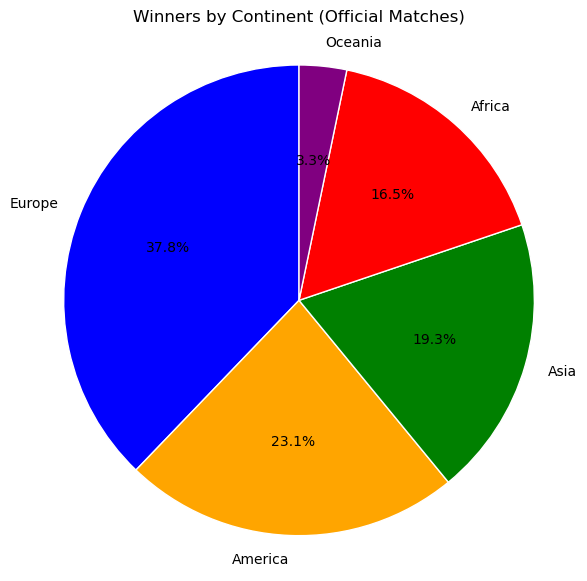

In [42]:


# Assuming wins_by_cont is already computed

# 1) Define your expanded color map
color_map = {
    'Asia':    'green',
    'Africa':  'red',
    'America': 'orange',
    'Europe':  'blue',
    'Oceania': 'purple'
}

# 2) Build the colors list in the same order as your DataFrame
colors = [ color_map.get(cont, 'gray') 
           for cont in wins_by_cont['winner_continent'] ]

# 3) Plot with your custom colors
plt.figure(figsize=(6,6))
plt.pie(
    wins_by_cont['wins'],
    labels=wins_by_cont['winner_continent'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(edgecolor='white')
)
plt.title('Winners by Continent (Official Matches)')
plt.axis('equal')
plt.tight_layout()
plt.show()


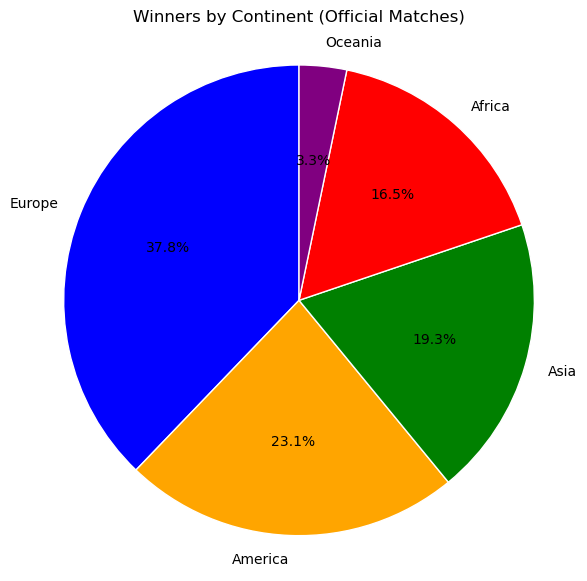

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# … after you’ve computed wins_by_cont …

# 1) Define exactly the color you want for each continent
color_map = {
    'Europe':  'blue',
    'Asia':    'green',
    'Africa':  'red',
    'America': 'orange',
    'Oceania': 'purple'
}

# 2) Build your colors list in the same order as the DataFrame
colors = [ color_map[cont] for cont in wins_by_cont['winner_continent'] ]

# 3) Draw the pie with your custom palette
plt.figure(figsize=(6,6))
plt.pie(
    wins_by_cont['wins'],
    labels     = wins_by_cont['winner_continent'],
    autopct    = '%1.1f%%',
    startangle = 90,
    colors     = colors,            # ← override here
    wedgeprops = dict(edgecolor='white')
)
plt.title('Winners by Continent (Official Matches)')
plt.axis('equal')
plt.tight_layout()
plt.show()




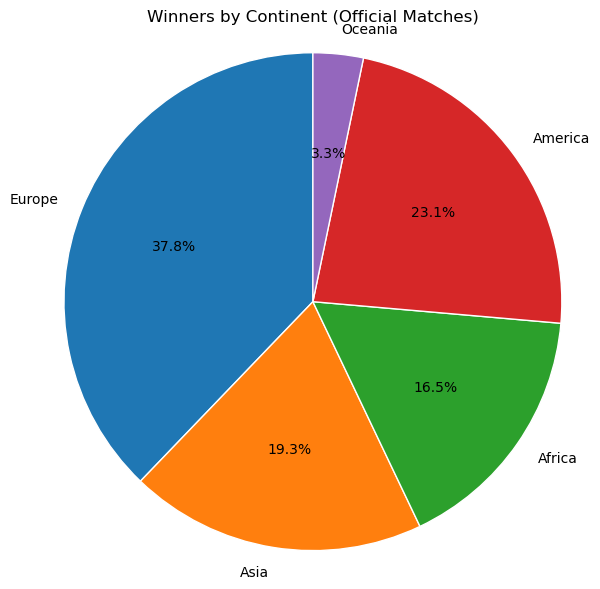

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# … steps 1–3 as before to compute wins_by_cont …

# 4) Specify the order you want
desired_order = ['Europe','Asia','Africa','America','Oceania']

# 5) Re‐index wins_by_cont to that order (dropping any not in the list)
wins_by_cont = (
    wins_by_cont
    .set_index('winner_continent')
    .reindex(desired_order)
    .dropna()                  # in case some continent has zero wins
    .reset_index()
)

# 6) Now plot in that order
plt.figure(figsize=(6,6))
plt.pie(
    wins_by_cont['wins'],
    labels     = wins_by_cont['winner_continent'],
    autopct    = '%1.1f%%',
    startangle = 90,
    wedgeprops = dict(edgecolor='white')
)
plt.title('Winners by Continent (Official Matches)')
plt.axis('equal')
plt.tight_layout()
plt.show()